In [2]:
# load apple data from pickle file
# if pickle is not imported, then import it
if not 'pickle' in globals():
    import pickle
# load the pickle file
apple_bars_df = pickle.load(open("apple_bar_data.pkl", "rb"))

In [3]:
#show the head of the dataframe
apple_bars_df.head()
apple_bars_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102559 entries, 2022-01-03 09:00:00+00:00 to 2022-06-30 23:59:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   open         102559 non-null  float64
 1   high         102559 non-null  float64
 2   low          102559 non-null  float64
 3   close        102559 non-null  float64
 4   volume       102559 non-null  int64  
 5   trade_count  102559 non-null  int64  
 6   vwap         102559 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 6.3 MB


Text(0.5, 0, 'Date')

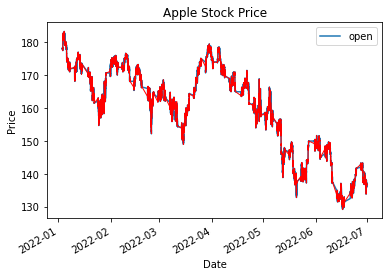

In [3]:
if not 'matplotlib' in globals():
    import matplotlib.pyplot as plt
# adjust figure size
plt.rcParams['figure.figsize'] = (10, 8)
# show a plot of the data
plot = apple_bars_df.plot(use_index=True, y='open' )
plot.add_line(plt.Line2D(apple_bars_df.index, apple_bars_df.close, color='red', linewidth=1, label='close'))
# title the axes
plot.set_title('Apple Stock Price')
plot.set_ylabel('Price')
plot.set_xlabel('Date')

In [4]:
apple_bars_df.corr()

,open,high,low,close,volume,trade_count,vwap
open,1.000000,0.999962,0.999958,0.999954,-0.013452,-0.016690,0.999950
high,0.999962,1.000000,0.999918,0.999963,-0.011587,-0.013050,0.999950
low,0.999958,0.999918,1.000000,0.999961,-0.015192,-0.020382,0.999947
close,0.999954,0.999963,0.999961,1.000000,-0.013293,-0.016565,0.999957
volume,-0.013452,-0.011587,-0.015192,-0.013293,1.000000,0.394493,-0.013386
trade_count,-0.016690,-0.013050,-0.020382,-0.016565,0.394493,1.000000,-0.016730
vwap,0.999950,0.999950,0.999947,0.999957,-0.013386,-0.016730,1.000000


<AxesSubplot:>

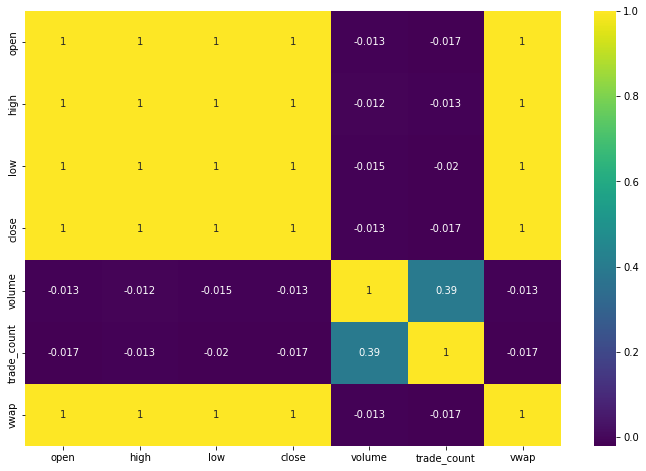

In [5]:
#import seaborn as sns if not imported
if not 'sns' in globals():
    import seaborn as sns
# create a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(apple_bars_df.corr(), annot=True, cmap='viridis')


In [4]:
#convert the dataframe index to a column
apple_bars_df['DateTime'] = apple_bars_df.index.to_pydatetime()
# remove the index from the dataframe
apple_bars_df = apple_bars_df.reset_index(drop=True)
# show the head of the dataframe
#apple_bars_df.head()

In [5]:
#%%script false
#drop all columns except for the DateTime and the vwap columns
apple_bars_df = apple_bars_df.drop(columns=['open', 'high', 'low', 'close', 'volume','trade_count'])
# show the head of the dataframe
#apple_bars_df.head()

In [6]:
#%%script false
# create a new dataframe with a column called 'Date' that contains the date of the data and colums for every DateTime with the corresponding vwap value

#create an array of all the unique dates in the dataframe
dates = apple_bars_df['DateTime'].dt.date.unique()
# make dates to list
dates = dates.tolist()
dates = list(map(lambda x: x.strftime('%Y-%m-%d'), dates))
#dates


In [9]:
#%%script false
# import pandas as pd if not imported
if not 'pd' in globals():
    import pandas as pd
    
# in a new dataframe, for each date in the array, create a columns for every vwap value for that date
apple_df = pd.DataFrame(index=dates, columns=range(0, 1000))

# get all vwap values for each date
for date in dates:
    # get the vwap values for that date
    vwap = apple_bars_df[apple_bars_df['DateTime'].dt.strftime('%Y-%m-%d') == date]['vwap'].tolist()
    # fill vwap list with zeros to match the length of the columns
    vwap = vwap + [0] * (1000 - len(vwap))
    # create a column for that date
    apple_df.loc[date] = vwap

In [10]:
#%%script false
apple_df.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-01-03,178.235733,178.331486,178.289889,178.207933,178.179138,178.042583,177.873264,177.87247,177.994209,177.915357,...,0,0,0,0,0,0,0,0,0,0
2022-01-04,181.904974,181.859539,181.845449,181.824149,181.843647,181.888155,181.881653,181.795025,181.824015,181.955434,...,0,0,0,0,0,0,0,0,0,0
2022-01-05,179.322448,179.339692,179.324874,179.335482,179.35,179.340266,179.341157,179.349428,179.3425,179.334831,...,0,0,0,0,0,0,0,0,0,0
2022-01-06,175.101076,175.155547,175.144149,175.103151,175.125732,175.107316,175.074358,175.068704,175.098636,175.133381,...,0,0,0,0,0,0,0,0,0,0
2022-01-07,172.607027,172.646683,172.634637,172.639361,172.604653,172.581681,172.63577,172.670661,172.649364,172.650006,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
%%script false
# some tests
apple_bars_df[apple_bars_df['DateTime'].dt.date==dates[0]]['DateTime'].dt.minute.unique()
apple_bars_df['DateTime'].dt.date.unique()[0].strftime('%Y-%m-%d')

'2022-01-03'

#save the dataframe to a pickle file
apple_df.to_pickle('apple_df.pkl')

In [11]:
#load the pickle file
apple_df = pd.read_pickle('apple_df.pkl')

In [12]:
#import numpy as np if not imported
if not 'np' in globals():
    import numpy as np
# set 'gain' column to 1 if column '0' is less than the last non-zero column in the row
apple_df['gain'] = apple_df.apply(lambda x: True if x[0] < x[x[x>0].last_valid_index()] else False, axis=1)

#print the head of the dataframe showing the index and the gain column as well as column 0 and the last non-zero column
print(apple_df.head(50)['gain'])

2022-01-03     True
2022-01-04    False
2022-01-05    False
2022-01-06    False
2022-01-07    False
2022-01-08     True
2022-01-10     True
2022-01-11     True
2022-01-12     True
2022-01-13    False
2022-01-14     True
2022-01-15     True
2022-01-18    False
2022-01-19    False
2022-01-20    False
2022-01-21    False
2022-01-22    False
2022-01-24    False
2022-01-25    False
2022-01-26     True
2022-01-27     True
2022-01-28     True
2022-01-29     True
2022-01-31     True
2022-02-01    False
2022-02-02    False
2022-02-03    False
2022-02-04    False
2022-02-05    False
2022-02-07     True
2022-02-08     True
2022-02-09     True
2022-02-10    False
2022-02-11    False
2022-02-12    False
2022-02-14     True
2022-02-15     True
2022-02-16    False
2022-02-17    False
2022-02-18    False
2022-02-19    False
2022-02-22     True
2022-02-23    False
2022-02-24     True
2022-02-25     True
2022-02-26    False
2022-02-28     True
2022-03-01    False
2022-03-02     True
2022-03-03     True


In [13]:
# pickle the dataframe
apple_df.to_pickle('apple_df_ML.pkl')